# Import libraries

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load data

In [29]:
data = pd.read_csv('C:/Users/piala/Documents/Github/regression_predict/Train.csv')
riders = pd.read_csv('C:/Users/piala/Documents/Github/regression_predict/Riders.csv')
test_data = pd.read_csv('C:/Users/piala/Documents/Github/regression_predict/Test.csv')

# Merge deliveries and riders data

In [30]:
data_merge = pd.merge(data, riders, how='left', left_on=['Rider Id'], right_on=['Rider Id'])
data_merge.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745,1637,1309,13.8,549
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993,396,339,13.6,69
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455,1023,242,12.5,114
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341,886,283,14.5,113
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214,2311,872,14.1,533


In [28]:
#Create the matrix of features.
X = data_merge.iloc[:, :-1].values #numpy array
print(X)

[['Order_No_4211' 'User_Id_633' 'Bike' ... 1309 13.8 549]
 ['Order_No_25375' 'User_Id_2285' 'Bike' ... 339 13.6 69]
 ['Order_No_1899' 'User_Id_265' 'Bike' ... 242 12.5 114]
 ...
 ['Order_No_2831' 'User_Id_2956' 'Bike' ... 473 13.8 29]
 ['Order_No_6174' 'User_Id_2524' 'Bike' ... 1821 14.0 1101]
 ['Order_No_9836' 'User_Id_718' 'Bike' ... 286 13.6 70]]


# Encode independent categorical variables

In [31]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [32]:
#Make User Id column numeric
a = data_merge['User Id'].str.split('User_Id_', n=1, expand = True)
data_merge['User Id (num)'] = a[1]
data_merge['User Id (num)'] = pd.to_numeric(data_merge['User Id (num)'])

In [33]:
#Make Rider Id column numeric
a = data_merge['Rider Id'].str.split('Rider_Id_', n=1, expand = True)
data_merge['Rider Id (num)'] = a[1]
data_merge['Rider Id (num)'] = pd.to_numeric(data_merge['Rider Id (num)'])

In [34]:
data_merge.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival,No_Of_Orders,Age,Average_Rating,No_of_Ratings,User Id (num),Rider Id (num)
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,-1.300406,36.829741,Rider_Id_432,745,1637,1309,13.8,549,633,432
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,-1.295004,36.814358,Rider_Id_856,1993,396,339,13.6,69,2285,856
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,-1.300921,36.828195,Rider_Id_155,455,1023,242,12.5,114,265,155
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,-1.257147,36.795063,Rider_Id_855,1341,886,283,14.5,113,1402,855
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,-1.295041,36.809817,Rider_Id_770,1214,2311,872,14.1,533,1737,770


In [144]:
#Remove unnecessary columns
data_merge.pop('Order No')
data_merge.pop('Vehicle Type')
data_merge.pop('Precipitation in millimeters')
data_merge.pop('User Id')
data_merge.pop('Rider Id')
data_merge.head()

,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),...,Pickup Long,Destination Lat,Destination Long,Time from Pickup to Arrival,No_Of_Orders,Age,Average_Rating,No_of_Ratings,User Id (num),Rider Id (num)
0,3,Business,9,5,9:35:46 AM,9,5,9:40:10 AM,9,5,...,36.830370,-1.300406,36.829741,745,1637,1309,13.8,549,633,432
1,3,Personal,12,5,11:16:16 AM,12,5,11:23:21 AM,12,5,...,36.899315,-1.295004,36.814358,1993,396,339,13.6,69,2285,856
2,3,Business,30,2,12:39:25 PM,30,2,12:42:44 PM,30,2,...,36.843419,-1.300921,36.828195,455,1023,242,12.5,114,265,155
3,3,Business,15,5,9:25:34 AM,15,5,9:26:05 AM,15,5,...,36.832396,-1.257147,36.795063,1341,886,283,14.5,113,1402,855
4,1,Personal,13,1,9:55:18 AM,13,1,9:56:18 AM,13,1,...,36.792118,-1.295041,36.809817,1214,2311,872,14.1,533,1737,770


In [145]:
#Move dependent variable to the end
x = data_merge.pop('Time from Pickup to Arrival')
data_merge['Time from Pickup to Arrival'] = x
data_merge.head()

,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),...,Pickup Long,Destination Lat,Destination Long,No_Of_Orders,Age,Average_Rating,No_of_Ratings,User Id (num),Rider Id (num),Time from Pickup to Arrival
0,3,Business,9,5,9:35:46 AM,9,5,9:40:10 AM,9,5,...,36.830370,-1.300406,36.829741,1637,1309,13.8,549,633,432,745
1,3,Personal,12,5,11:16:16 AM,12,5,11:23:21 AM,12,5,...,36.899315,-1.295004,36.814358,396,339,13.6,69,2285,856,1993
2,3,Business,30,2,12:39:25 PM,30,2,12:42:44 PM,30,2,...,36.843419,-1.300921,36.828195,1023,242,12.5,114,265,155,455
3,3,Business,15,5,9:25:34 AM,15,5,9:26:05 AM,15,5,...,36.832396,-1.257147,36.795063,886,283,14.5,113,1402,855,1341
4,1,Personal,13,1,9:55:18 AM,13,1,9:56:18 AM,13,1,...,36.792118,-1.295041,36.809817,2311,872,14.1,533,1737,770,1214


In [35]:
#One hot encode 'Personal or Business' columns
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), ['Personal or Business'])], remainder='passthrough')
X = pd.DataFrame(ct.fit_transform(data_merge))
X.head()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,1,0,Order_No_4211,User_Id_633,Bike,3,9,5,9:35:46 AM,9,...,-1.30041,36.8297,Rider_Id_432,745,1637,1309,13.8,549,633,432
1,0,1,Order_No_25375,User_Id_2285,Bike,3,12,5,11:16:16 AM,12,...,-1.295,36.8144,Rider_Id_856,1993,396,339,13.6,69,2285,856
2,1,0,Order_No_1899,User_Id_265,Bike,3,30,2,12:39:25 PM,30,...,-1.30092,36.8282,Rider_Id_155,455,1023,242,12.5,114,265,155
3,1,0,Order_No_9336,User_Id_1402,Bike,3,15,5,9:25:34 AM,15,...,-1.25715,36.7951,Rider_Id_855,1341,886,283,14.5,113,1402,855
4,0,1,Order_No_27883,User_Id_1737,Bike,1,13,1,9:55:18 AM,13,...,-1.29504,36.8098,Rider_Id_770,1214,2311,872,14.1,533,1737,770


In [36]:
data_merge['Business'] = X[0]
data_merge['Personal'] = X[1]
data_merge.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Rider Id,Time from Pickup to Arrival,No_Of_Orders,Age,Average_Rating,No_of_Ratings,User Id (num),Rider Id (num),Business,Personal
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,Rider_Id_432,745,1637,1309,13.8,549,633,432,1,0
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,Rider_Id_856,1993,396,339,13.6,69,2285,856,0,1
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,Rider_Id_155,455,1023,242,12.5,114,265,155,1,0
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,Rider_Id_855,1341,886,283,14.5,113,1402,855,1,0
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,Rider_Id_770,1214,2311,872,14.1,533,1737,770,0,1


In [37]:
data_merge['Placement - Time'] = pd.to_datetime(data_merge['Placement - Time'], format='%I:%M:%S %p')
data_merge['Placement - Time'] = pd.Series([val.time() for val in data_merge['Placement - Time']])
data_merge['Placement - Time'].head()

0    09:35:46
1    11:16:16
2    12:39:25
3    09:25:34
4    09:55:18
Name: Placement - Time, dtype: object

In [38]:
data_merge['Confirmation - Time'] = pd.to_datetime(data_merge['Confirmation - Time'], format='%I:%M:%S %p')
data_merge['Confirmation - Time'] = pd.Series([val.time() for val in data_merge['Confirmation - Time']])
data_merge['Confirmation - Time'].head()

0    09:40:10
1    11:23:21
2    12:42:44
3    09:26:05
4    09:56:18
Name: Confirmation - Time, dtype: object

In [39]:
data_merge['Arrival at Pickup - Time'] = pd.to_datetime(data_merge['Arrival at Pickup - Time'], format='%I:%M:%S %p')
data_merge['Arrival at Pickup - Time'] = pd.Series([val.time() for val in data_merge['Arrival at Pickup - Time']])
data_merge['Arrival at Pickup - Time'].head()

0    10:04:47
1    11:40:22
2    12:49:34
3    09:37:56
4    10:03:53
Name: Arrival at Pickup - Time, dtype: object

In [40]:
data_merge['Pickup - Time'] = pd.to_datetime(data_merge['Pickup - Time'], format='%I:%M:%S %p')
data_merge['Pickup - Time'] = pd.Series([val.time() for val in data_merge['Pickup - Time']])
data_merge['Pickup - Time'].head()

0    10:27:30
1    11:44:09
2    12:53:03
3    09:43:06
4    10:05:23
Name: Pickup - Time, dtype: object

In [41]:
data_merge['Arrival at Destination - Time'] = pd.to_datetime(data_merge['Arrival at Destination - Time'], format='%I:%M:%S %p')
data_merge['Arrival at Destination - Time'] = pd.Series([val.time() for val in data_merge['Arrival at Destination - Time']])
data_merge['Arrival at Destination - Time'].head()

0    10:39:55
1    12:17:22
2    13:00:38
3    10:05:27
4    10:25:37
Name: Arrival at Destination - Time, dtype: object

In [42]:
data_merge.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Rider Id,Time from Pickup to Arrival,No_Of_Orders,Age,Average_Rating,No_of_Ratings,User Id (num),Rider Id (num),Business,Personal
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,09:35:46,9,5,...,Rider_Id_432,745,1637,1309,13.8,549,633,432,1,0
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16,12,5,...,Rider_Id_856,1993,396,339,13.6,69,2285,856,0,1
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25,30,2,...,Rider_Id_155,455,1023,242,12.5,114,265,155,1,0
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,09:25:34,15,5,...,Rider_Id_855,1341,886,283,14.5,113,1402,855,1,0
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,09:55:18,13,1,...,Rider_Id_770,1214,2311,872,14.1,533,1737,770,0,1


In [43]:
data_merge.to_csv('data_merge.csv')

# EDA

In [44]:
import seaborn as sns

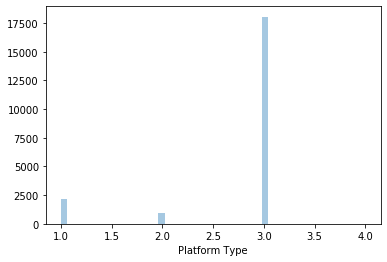

In [69]:
a = sns.distplot(data_merge['Platform Type'], kde=False)
plt.show()

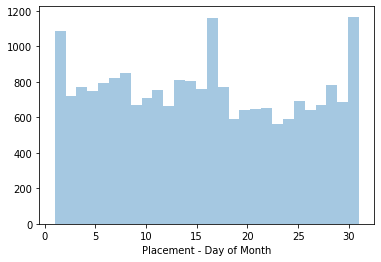

In [73]:
a = sns.distplot(data_merge['Placement - Day of Month'], kde=False)
plt.show()

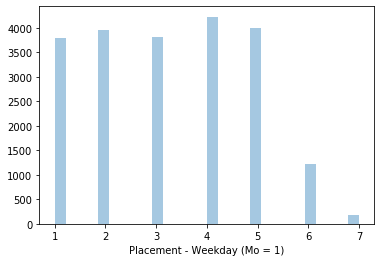

In [74]:
a = sns.distplot(data_merge['Placement - Weekday (Mo = 1)'], kde=False)
plt.show()

# Split the training set into training and validation set
(enable us to evaluate our model because we don't have the ground truths of the test set)

In [12]:
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

# Missing data

# Encode categorical data
(Check dummy variable trap, only include n-1 dummy variables for every case where a dummy variable is necessary)

# Check assumptions of linear regression:
1. Linearity
2. Homoscedasticity
3. Multivariate normality
4. Independence of errors
5. Lack of multicolinearity

# Evaluation
Predicting the test set results
1. Plot predicted times from pick up to arrival
2. Select model with minimum mean square error in the test dataset